In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [3]:
#read into CSV files
CustomerAddress = pd.read_csv('Customer Address.csv')
CustomerDemographic = pd.read_csv('Customer Demographic.csv')
Transactions = pd.read_csv('Transactions.csv')


Cleaning CustomerDemographic

In [4]:
 # dropping irrelevant columns

selected_columns = [
'customer_id', 'first_name', 'last_name', 'gender',
'past_3_years_bike_related_purchases', 'DOB', 'job_title',
'job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car','tenure'
]

CustomerDemographicSubset = CustomerDemographic[selected_columns].copy()

    # .copy creates a copy of the dataframe you're subsetting vs a view

print(CustomerDemographicSubset.columns)

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')


In [5]:
# dropping nulls

null_percentage = (CustomerDemographicSubset.isnull().sum() / len(CustomerDemographicSubset) * 100).round(2)

print(null_percentage)

CustomerDemographicSubset.dropna(inplace=True)

customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title                              12.65
job_industry_category                  16.40
wealth_segment                          0.00
deceased_indicator                      0.00
owns_car                                0.00
tenure                                  2.17
dtype: float64


In [11]:
# handling consistency errors in the gender column

CustomerDemographicSubset['gender'] = CustomerDemographicSubset['gender'].replace('F','Female')

CustomerDemographicSubset['gender'] = CustomerDemographicSubset['gender'].replace('Femal','Female')

CustomerDemographicSubset = CustomerDemographicSubset[CustomerDemographicSubset['gender'] !='U']

    # if I didn't reassign it to itself then it would just be a view

print(CustomerDemographicSubset.gender.value_counts(), '\n')

gender
Female    1446
Male      1333
Name: count, dtype: int64 



In [7]:
# convert DOB to datetime

CustomerDemographicSubset['DOB'] = pd.to_datetime(CustomerDemographicSubset['DOB'], format='mixed')

    # pd.to_datetime is pretty smart at detecting dates if it's in some sort of standard format


In [8]:
# Final Cleaned Dataset

Clean
CustomerDemographicSubset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


Clean Transactions

In [9]:
# subset dataframe

cols = ['transaction_id','product_id','customer_id','transaction_date','online_order', 'order_status','brand','product_line','product_class','product_size','list_price','standard_cost' ]

TransactionsSubset = Transactions[cols].copy()

In [10]:
# drop nulls

TransactionsSubset.dropna(inplace=True)

In [11]:
# Final cleaned dataset ready for merging

TransactionsSubset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48


Clean Customer Address

In [12]:
# handle inconsistency in state column

# create a dictionary with the replacements you want to make in the column
state_replacements = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC'
}

# Use .replace() method on state column and pass in the dictionary of replacements
CustomerAddress['state'] = CustomerAddress['state'].replace(state_replacements)

In [13]:
# subset dataframe

sub_columns = ['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation']

CustomerAddressSubset = CustomerAddress[sub_columns].copy()

In [14]:
# Final cleaned dataset ready to merge

CustomerAddressSubset.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [15]:
# Merge the customer demographic dataset with the customer address dataset
# Inner join is used to ensure customers are present in both datasets

merged_customer_info = CustomerDemographicSubset.merge(CustomerAddressSubset, on="customer_id", how="inner")

merged_customer_info.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,Yes,8.0,2 Sutherland Street,3799,VIC,Australia,6


In [35]:
# checking to see if there's nulls after merging or any unique values

print(merged_customer_info.isnull().sum(), '\n')

print(merged_customer_info.customer_id.nunique())

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64 

2777


In [16]:
merged_customer_info.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,Yes,8.0,2 Sutherland Street,3799,VIC,Australia,6


In [17]:
# Convert customer date of birth to customer age

# Ensure DOB in datetime format
merged_customer_info["DOB"] = pd.to_datetime(merged_customer_info["DOB"])

# Specify the "current" date and time
    # In the context of this exercise, we will call the current date 12/31/2017
        # This is one day after the most recent transactions recorded
current_date = datetime(2017, 12, 31)

# Calculate the age of each customer by counting the years since DOB
age = ((current_date - merged_customer_info["DOB"]).dt.days // 365)

# Add age as a new column to the merged customer dataframe
merged_customer_info["age"] = age

# Print descriptive statistics of age column
merged_customer_info["age"].describe()

count    2778.000000
mean       39.892009
std        12.781897
min        15.000000
25%        30.000000
50%        40.000000
75%        49.000000
max       174.000000
Name: age, dtype: float64

RFM Data Transformations and Variable Creation

In [28]:
# RECENCY (not normalized)

    # create a col in the merged customer df w days since last purchase

# Ensure transaction date is in datetime format
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

# Calculate each customer's most recent transaction date
most_recent_transaction = Transactions.groupby('customer_id')['transaction_date'].max().reset_index()

# Current date and time is 12/31/2017 (one dat after most recent transaction recorded
    # can check this with Transactions['transaction_date'].max()

current_date = datetime(2017,12,31)

# Calculate number of days since each customer's last transaction
days_since_purchase = (current_date - most_recent_transaction['transaction_date']).dt.days

# Add days_since_purchase as a new col to merged_customer_info
merged_customer_info['R Value'] = days_since_purchase

# print descriptive stats of the R Value col
merged_customer_info['R Value'].describe()

count    2778.000000
mean       61.392369
std        57.303262
min         1.000000
25%        18.000000
50%        44.000000
75%        85.000000
max       334.000000
Name: R Value, dtype: float64

In [31]:
# FREQUENCY (not normalized)

# create a new col in merged_customer_info w a count of each customer's transactions
merged_customer_info['F Value'] = Transactions.groupby('customer_id')['list_price'].count()

# descriptive statistics for F Value col
merged_customer_info['F Value'].describe()
    # max transactions is 14
    # min transactions is 1

count    2772.000000
mean        5.754690
std         2.344799
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: F Value, dtype: float64

In [34]:
# MONETARY ( not normalized)

# create a col in merged_customer_info w each customer's total purchase amount
merged_customer_info['M Value'] = Transactions.groupby('customer_id')['list_price'].sum()

# descriptive statistics of the M Value column
merged_customer_info["M Value"].describe()

    # most a customer spent was $19,071
    # min is $71

count     2772.000000
mean      6376.600696
std       2957.685811
min         71.490000
25%       4213.325000
50%       6086.660000
75%       8228.767500
max      19071.320000
Name: M Value, dtype: float64

RFM Score Calculation

In [35]:
# RECENCY: Define the number of bins
# 5 bins for all RFM this is industry standard

num_Rbins = 5

# Create quantiles (equal-sized numerical bins) for Recency (R)
merged_customer_info["R Score"] = pd.qcut(merged_customer_info['R Value'], q=num_Rbins, labels=False, duplicates='drop') + 1

# FREQUENCY: Define the number of bins
num_Fbins = 5
# Create quantiles (equal-sized numerical bins) for Frequency (F)
merged_customer_info["F Score"] = pd.qcut(merged_customer_info["F Value"], q=num_Fbins, labels=False, duplicates='drop') + 1

# MONETARY VALUE: Define the number of bins
num_Mbins = 5
# Create quantiles (equal-sized numerical bins) for Monetary Value (M)
merged_customer_info["M Score"] = pd.qcut(merged_customer_info["M Value"], q=num_Mbins, labels=False, duplicates='drop') + 1



K Means Clustering

In [37]:
# Extract RFM Scores fo K-means clustering
rfm = merged_customer_info[['customer_id','R Score', 'F Score', 'M Score']]

# set customer id as the index because we're not using it to cluster
rfm.set_index('customer_id', inplace=True)

In [39]:
# Notice there are rows w null values still so drop

rfm.dropna(inplace=True)

C:\Users\saman\AppData\Local\Temp\ipykernel_4100\4151617466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.dropna(inplace=True)


C:\Users\saman\PycharmProjects\SummerPythonLearning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saman\PycharmProjects\SummerPythonLearning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saman\PycharmProjects\SummerPythonLearning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saman\PycharmProjects\SummerPythonLearning\venv\Lib\site-packages\skle

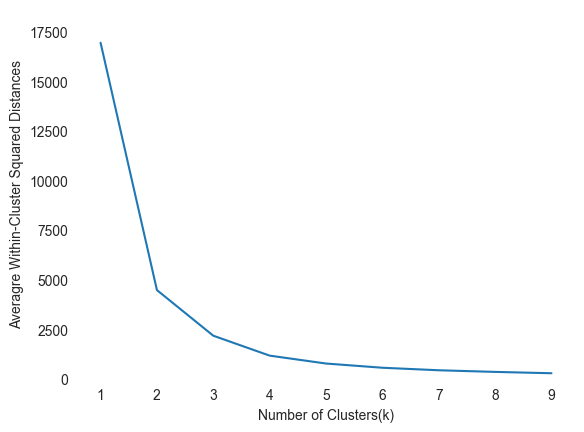

In [42]:
# Find optimal number of clusters using elbow method

fix, ax = plt.subplots(facecolor = "white")
inertia = []
for n_clusters in range (1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rfm) # pass in rfm
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), "inertia": inertia})
ax = inertias.plot(x="n_clusters", y="inertia", ax=ax)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Averagre Within-Cluster Squared Distances")
plt.ylim({0, 1.1 * inertias.inertia.max()})
ax.legend().set_visible(False)
ax.patch.set_facecolor("white")
plt.show()

In [43]:
# Run K-Means Clustering on the rfm df wih 4 clusters

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(rfm)

C:\Users\saman\PycharmProjects\SummerPythonLearning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [44]:
# setting customers to clusters
membership = pd.Series(kmeans.labels_, index=rfm.index)
membership.head()

# customer 2 is in cluster 1


customer_id
2     1
9     3
12    1
13    0
14    1
dtype: int32

    R Score   F Score   M Score
0  1.938287  1.469773  1.827456
1  3.950119  3.880048  4.161520
2  1.460457  3.905097  4.131810
3  4.500882  1.365079  1.781305


(-0.25, 2.5)

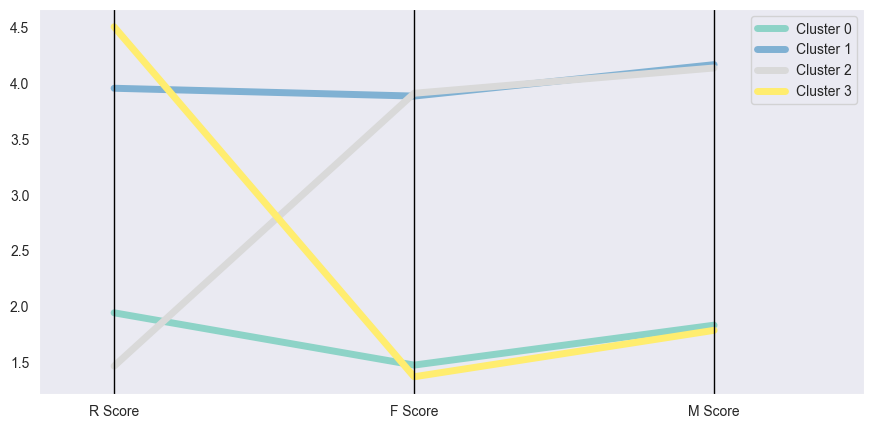

In [45]:
# visualize the average Recency (R), Frequency (F), and Monetary (M) scores for different clusters.

# Get the centriods out from the kmeans instance

centriods = pd.DataFrame(kmeans.cluster_centers_, columns=rfm.columns)
print(centriods)

centriods["cluster"] = ["Cluster {}".format(i) for i in centriods.index]

# Plotting cluster centers
fig = plt.figure(figsize=(10,5), facecolor="white")
fig.subplots_adjust(right=0.95)
ax = parallel_coordinates(centriods, class_column="cluster", colormap="Set3", linewidth=5)
plt.xlim(-0.25, 2.5)

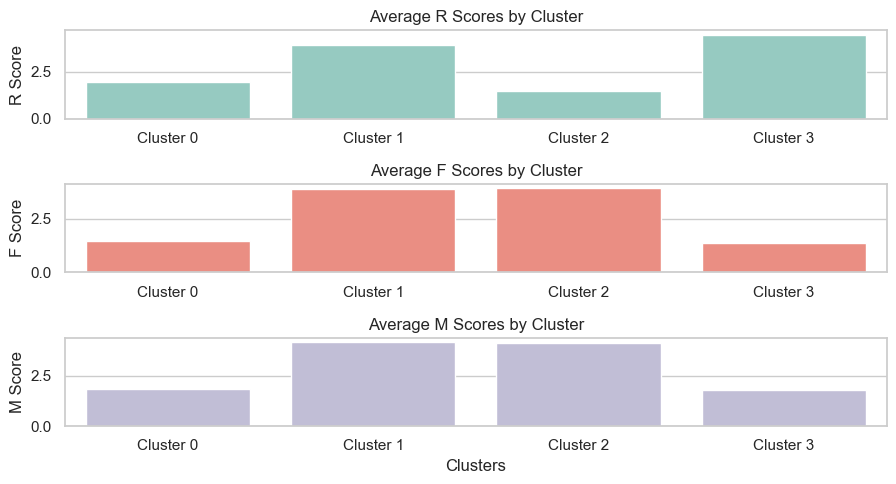

In [46]:
# visualize the average Recency (R), Frequency (F), and Monetary (M) scores for different clusters.

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure with subplots for R, F, and M scores
fig, axes = plt.subplots(3, 1, figsize=(9,5))

# Plot average R scores for each cluster
sns.barplot(data=centriods, x='cluster', y='R Score', color='#8DD3C7', ax=axes[0])

axes[0].set_xlabel('')
axes[0].set_ylabel('R Score')
axes[0].set_title('Average R Scores by Cluster')

# Plot average F scores for each cluster
sns.barplot(data=centriods, x='cluster', y='F Score', color='#FB8072', ax=axes[1])

axes[1].set_xlabel('')
axes[1].set_ylabel('F Score')
axes[1].set_title('Average F Scores by Cluster')

# Plot average M scores for each cluster
sns.barplot(data=centriods, x='cluster', y='M Score', color='#BEBADA', ax=axes[2])

axes[2].set_xlabel('Clusters')
axes[2].set_ylabel('M Score')
axes[2].set_title('Average M Scores by Cluster')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


Export to CSV file

In [49]:
# Assign a name to the Series holding cluster membership information
membership.name = 'Cluster'

# Merge the original data with the Series on 'customer_id'
rfm_merged = merged_customer_info.merge(membership, left_on="customer_id", right_index=True)



In [51]:
rfm_merged.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,country,property_valuation,age,R Value,F Value,M Value,R Score,F Score,M Score,Cluster
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Australia,10,37,129,11.0,9084.45,5,5.0,5.0,1
2,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,Australia,12,44,103,3.0,4149.07,5,1.0,2.0,3
3,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,...,Australia,4,23,196,8.0,9888.23,5,4.0,5.0,1
4,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,...,Australia,6,62,17,2.0,1047.72,2,1.0,1.0,0
5,14,Rayshell,Kitteman,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,...,Australia,8,34,65,6.0,5903.20,4,3.0,3.0,1


In [52]:
rfm_merged.to_csv('rfm_merged', index=False)